# Day 11 In-class Assignment: Get the Lead Out: Understanding The Water Crisis in Flint, MI

### <p style="text-align: right;"> &#9989; Andrew.</p>

#### <p style="text-align: right;"> &#9989; Jackson, Noah.</p>

<div align="center"><img src="https://assets1.cbsnewsstatic.com/hub/i/r/2017/09/21/d348dfb2-b44c-49de-95c5-893fdf143ce6/thumbnail/620x349/d43e72275d7f4c4966124cfd9e66e22a/0921-eve-flinthearing-reynolds.jpg" width=600px></div>


## Learning Goals:

By the end of this assignment you should be able to:
* Use Pandas to filter data to select particular subsets of interest
* Articulate, based on your own perception, what you thinks makes a data visualization "good" versus "bad"
* Use data to support a claim or make an argument

## Assignment instructions

Work with your group to complete this assignment. Instructions for submitting this assignment are at the end of the notebook. The assignment is due at the end of class.

---
# Background and motivation

Today we want you to think about what the data is telling you, but still use coding to help you; and, use some of the visualization ideas you explored above. We'll be looking at the publicly released [Flint Water Quality dataset](http://flintwaterstudy.org/2015/12/complete-dataset-lead-results-in-tap-water-for-271-flint-samples/). The water testing method involves collecting three different bottles worth of water.

**Review the properties of the data, read the descriptions of the data fields, and review what the Evironmental Protection Agency (EPA) limits are on lead in water supplies.**

In [17]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# Loading the data
flint_data = pd.read_csv('flint_water_data.csv')

Double-check that your data loaded correctly by displaying the first first lines.

In [4]:
# Put your code here
flint_data.head()

,SampleID,Zip Code,Ward,PbBottle1_ppb,PbBottle2_ppb,PbBottle3_ppb,Notes
0,1,48504,6,0.344,0.226,0.145,NaN
1,2,48507,9,8.133,10.770,2.761,NaN
2,4,48504,1,1.111,0.110,0.123,NaN
3,5,48507,8,8.007,7.446,3.384,NaN
4,6,48505,3,1.951,0.048,0.035,NaN


#### Description of data fields in this data set:

- *SampleID*: Unique study code for each sample
- *Zip Code*: location where samples were collected
- *Ward*: location where samples were collected
- *PbBottle1_ppb*: Concentration of lead in parts per billion (ppb) in sample acquired at initial turn on of water
- *PbBottle2_ppb*: Concentration of lead in parts per billion (ppb) in sample acquired after 45 seconds of flushing water
- *PbBottle3_ppb*: Concentration of lead in parts per billion (ppb) in sample acquired after 120 seconds of flushing water


#### EPA Limits (i.e. how does the EPA define unsafe lead levels in a water supply?)


The U.S. Environmental Protection Agency (EPA) guidelines about lead contaminants state:

> Lead and copper are regulated by a treatment technique that requires systems to control the corrosiveness of their water. **If more than 10% of tap water samples exceed the action level,** water systems must take additional steps. For copper, the action level is 1.3 mg/L (1300 ppb), and **for lead is 0.015 mg/L (15 ppb).** 
>
> Source: (http://www.epa.gov/your-drinking-water/table-regulated-drinking-water-contaminants#seven). 




---
## 1. Analysis Using Descriptive Statistics
### 1.1
Use `describe()` function to determine the mean, standard deviation, min, median, and max of the first set of samples (`PbBottle1_ppb`). 

In [26]:
# Write your code here
#flint_data.keys()
PbBottles1 = flint_data['PbBottle1_ppb']
PbBottles1.describe()

count    270.000000
mean      10.658593
std       21.599817
min        0.344000
25%        1.574500
50%        3.502500
75%        9.175000
max      158.000000
Name: PbBottle1_ppb, dtype: float64

### 1.2
From this information alone, can you determine if the water supply in Flint met the EPA standard?

<font size="+3" color="green">&#9998;</font> While we know at least 50% is less than the minimum and the maximum exceeds the standard, we do not know if 10% of the data exceeds the standard, and cannot determine.

### 1.3
What is the median of this sample? How does it compare to the mean? Do you expect this sample to be close to a normal (Gaussian) distribution? (think back on your pre-class assignment about the properties of normal distributions)

<font size="+3" color="green">&#9998;</font> The median is much lower than the mean, which suggests that this will not be a normal distribution and will instead have some very high outliers

---
## 2. Analysis Using Visualizations
### 2.1
Make a histogram visualization of the distribution of the first set of samples (`PbBottle1_ppb`). Use the `axvline()` function to add a line showing where the EPA limit is. (You will may need to us google to remind yourself what this function does.)

Also, make sure that your plot has x and y-axes labels and a title.

Text(0.5, 1.0, 'Flint the Musical')

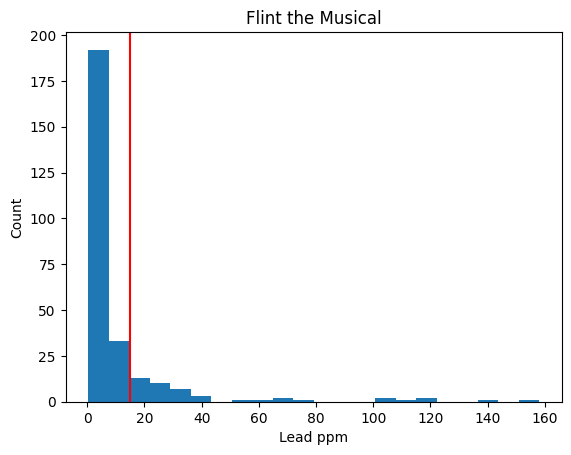

In [40]:
# Write your code here
plt.hist(PbBottles1,22)
plt.axvline(15, color = 'red')
plt.xlabel('Lead ppm')
plt.ylabel('Count')
plt.title('Flint the Musical')

### 2.2
Does the distribution of samples look like a normal (Gaussian) distribution? Is that what you predicted based on your analysis of the descriptive statistics (Part 1.3)?

<font size="+3" color="green">&#9998;</font> Certainly not a gaussian, looks like a few large outliers pull up the mean

### 2.3
Looking at this, there’s a big pile up of samples that are near or below the EPA limit, and it makes it hard to get a sense of what the full distribution looks like. Use `plt.yscale()` to make the y-axis logarithmic. 

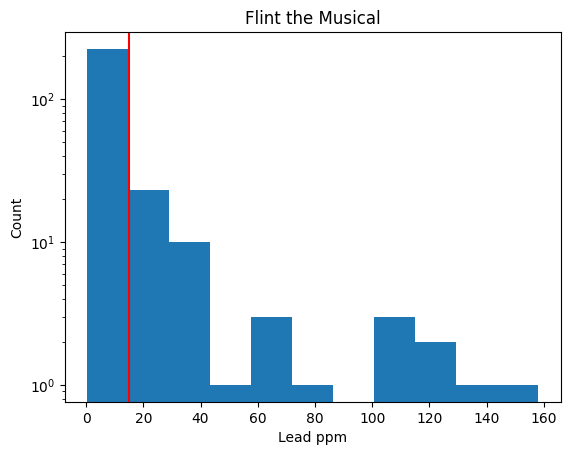

In [44]:
# Write your code here
plt.hist(PbBottles1,11)
plt.axvline(15, color = 'red')
plt.xlabel('Lead ppm')
plt.ylabel('Count')
plt.title('Flint the Musical')
plt.yscale('log')
#plt.grid(True)

### 2.4
As discussed in the pre-class, logarithmic scales allow us to get a better handle on distributions with a *large dynamic range*. Use your log plot estimate the number of samples that lie above the EPA limit by counting the number of samples that fall into the bins that are above the limit.

What fraction of the total samples appear to fall above the EPA limit?

<font size="+3" color="green">&#9998;</font> Probably close to 10-20%

### 2.5
Based on this analysis, does it appear that the Flint samples met the EPA standards?

<font size="+3" color="green">&#9998;</font> Without doing some proper mathing id say it looks a bit problematic

## STOP
Based on your analysis so far, answer the following question: ***Would you feel comfortable drinking a glass of water in Flint at the height of the water crisis?***

<font size="+3" color="green">&#9998;</font> I'd have a glass, maybe not two

---
## 3. Analysis Using Masks

In the previous part, you used descriptive statistics and a visualization to try to estimate the number of samples that fell above the EPA limit. Now we’re going to actually count the number that actually don’t meet the EPA regulation. 

### 3.1

Create a mask and a new dataframe that only contain samples where `PbBottle1_ppb` was greater than the EPA limit.

In [53]:
# Write your code here
too_much = PbBottles1 > 15
over_the_limit = PbBottles1[too_much]
over_the_limit.describe()
#print(45/270)

count     45.000000
mean      44.633333
std       37.137582
min       15.550000
25%       20.220000
50%       28.910000
75%       56.260000
max      158.000000
Name: PbBottle1_ppb, dtype: float64

### 3.2
Answer the following questions: 
1. How many samples were above the EPA limit? 
2. What fraction of the total samples does this comprise? 

<font size="+3" color="green">&#9998;</font> 45 bad /270 total = 16.6%

### 3.3
Based on this analysis, do these samples meet the EPA standards?

<font size="+3" color="green">&#9998;</font> Unsuprisingly, it does not

---
## 4. Extending Analysis to the Other Samples

Repeat the analysis you did parts 1, 2, and 3 for both the `PbBottle2_ppb` and  `PbBottle3_ppb` samples. Recall that these are samples drawn 45 seconds after the taps are turned on (`PbBottle2_ppb`) and two minutes after the taps are turned on (`PbBottle3_ppb`). 
To complete this section, you should:
1. Fill in the table below with descriptive statistics and fraction of samples above the EPA limit.
2. Have a three panel plot showing the distribution of samples. The y-axes for each of them should be logarithmic and each plot should have x and y-axes labels and a title.


| Sample | Mean | Std. Dev | Min | Median | Max | Fraction > EPA |
| :----- | :----- | :------ | :----- | :----- | :----- | :----- |
| PbBottle1_ppb | ??| ?? | ??  | ?? | ?? | ?? |
| PbBottle2_ppb | ??| ?? | ??  | ?? | ?? | ?? |
| PbBottle3_ppb | ??| ?? | ??  | ?? | ?? | ?? |

In [120]:
flint_data.head()
flint_data.keys()[3:6]
summary = PbBottles.describe().T
#print(summary)


                    mean        std    min     50%     max  Fraction > EPA
PbBottle1_ppb  10.658593  21.599817  0.344  3.5025  158.00        0.166667
PbBottle2_ppb   6.446704  23.157891  0.032  1.3975  259.80        0.062963
PbBottle3_ppb   3.669344  10.557109  0.031  0.8200   94.52        0.044444


In [144]:
# Write your code here

PbBottles = flint_data[flint_data.keys()[3:6]]
too_much = PbBottles > 15
over_the_limit = PbBottles[too_much]
over_the_limit.describe()
raw = over_the_limit.describe().T['count']
fraction = raw / 270
summary = PbBottles.describe().T
#summary.pop()

pandatable = pd.DataFrame(summary[['mean','std','min','50%','max']])
pandatable['Fraction > EPA'] = fraction

print(pandatable)

#list = ['Sample']
#for i in pandatable.columns:
#    list.append(i)
#list.append(pandatable.columns)
#
#pandatable.columns = list

                    mean        std    min     50%     max  Fraction > EPA
PbBottle1_ppb  10.658593  21.599817  0.344  3.5025  158.00        0.166667
PbBottle2_ppb   6.446704  23.157891  0.032  1.3975  259.80        0.062963
PbBottle3_ppb   3.669344  10.557109  0.031  0.8200   94.52        0.044444


## 5. Conclusions

Based on your new analysis, answer the following question: ***Would you feel comfortable drinking a glass of water in Flint at the height of the water crisis?*** 

**Use statistical values and/or data visualizations to back up your choice.**

<font size="+3" color="green">&#9998;</font> I would feel comfortable if I let the water run for 2 miunutes before drinking it, but I wouldn't want to make it a habit. The water becomes below the EPA's limit for 95% of houses after letting the water run for two minutes, and I'd only be drinking it once. Lead builds up over time.

## 6. (Time Permitting) Looking for Other Sources of Analysis

For your project, it will be good to draw upon other resources to compare your results/conclusions to. 

Go through the [following article from the New York Times](https://www.nytimes.com/2018/07/22/opinion/flint-lead-poisoning-water.html) and compare it's conclusions to your own from Part 5. Given the information in this article, ***Would you feel comfortable drinking a glass of water in Flint at the height of the water criss?*** 


**NOTE:** If you are an MSU student, you have access to a free New York Times account. [Click this link](https://asmsu.msu.edu/home/services/717-2/) and follow the steps to get access through MSU. 

<font size="+3" color="green">&#9998;</font> *Write your answer here*

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [145]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---

## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

&#169; Copyright 2023,  The Department of Computational Mathematics, Science and Engineering at Michigan State University